In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [5]:
# 콘파이 틀

from konlpy.tag import Mecab
mecab = Mecab()
print(mecab.morphs(u'영등포구청역에 있는 맛집 좀 알려주세요.'))
# 어절별로 끊어
print(mecab.nouns(u'영등포구청역에 있는 맛집 좀 알려주세요.'))
# noun만 추출
print(mecab.pos(u'영등포구청역에 있는 맛집 좀 알려주세요.'))
# 어절과 형태소 표시

['영등포구청역', '에', '있', '는', '맛집', '좀', '알려', '주', '세요', '.']
['영등포구청역', '맛집']
[('영등포구청역', 'NNP'), ('에', 'JKB'), ('있', 'VV'), ('는', 'ETM'), ('맛집', 'NNG'), ('좀', 'MAG'), ('알려', 'VV+EC'), ('주', 'VX'), ('세요', 'EP+EF'), ('.', 'SF')]


In [7]:
# 데이터 불러오기
train_df=pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/ratings_train.txt',sep='\t')

In [9]:
# 내용물
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [8]:
# 컬럼 수
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [11]:
test_df=pd.read_csv("./data/ratings_test.csv",sep="\t")
test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [15]:
train_df['label'].value_counts()

label
0    75173
1    74827
Name: count, dtype: int64

In [16]:
test_df['label'].value_counts()

label
1    25173
0    24827
Name: count, dtype: int64

In [27]:
# 컬럼삭제
train_df=train_df.dropna()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [25]:
# 컬럼삭제
test_df = test_df.dropna()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49997 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49997 non-null  int64 
 1   document  49997 non-null  object
 2   label     49997 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [18]:
train_df['document'] # 250512:13:15

0                                       아 더빙.. 진짜 짜증나네요 목소리
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                             교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                                  인간이 문제지.. 소는 뭔죄인가..
149996                                        평점이 너무 낮아서...
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                          청춘 영화의 최고봉.방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 150000, dtype: object

In [28]:
test_df['document'] # 250512:13:15

0                                                      굳 ㅋ
1                                     GDNTOPCLASSINTHECLUB
2                   뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
3                         지루하지는 않은데 완전 막장임... 돈주고 보기에는....
4        3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??
                               ...                        
49995            오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함
49996         의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO
49997                   그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다
49998       절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네
49999                                           마무리는 또 왜이래
Name: document, Length: 49997, dtype: object

### 정규표현식 통해 특수문자 제거

In [19]:
import re

In [20]:
# 함수 생성
def text_clean(x):
    pattern = r'[가-힣0-9a-zA-Z]+'
    matches = re.findall(pattern, x)
    matches = " ".join(matches)
    return matches

In [29]:
train_df['document'].apply(text_clean)

0                                         아 더빙 진짜 짜증나네요 목소리
1                              흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                                교도소 이야기구먼 솔직히 재미는 없다 평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                                      인간이 문제지 소는 뭔죄인가
149996                                           평점이 너무 낮아서
149997                        이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다
149998                          청춘 영화의 최고봉 방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 149995, dtype: object

In [30]:
test_df['document'].apply(text_clean)

0                                                    굳
1                                 GDNTOPCLASSINTHECLUB
2                   뭐야 이 평점들은 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
3                            지루하지는 않은데 완전 막장임 돈주고 보기에는
4        3D만 아니었어도 별 다섯 개 줬을텐데 왜 3D로 나와서 제 심기를 불편하게 하죠
                             ...                      
49995          오랜만에 평점 로긴했네 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함
49996     의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO
49997                  그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다
49998       절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네
49999                                       마무리는 또 왜이래
Name: document, Length: 49997, dtype: object

In [31]:
# 감성분석 준비단계
X = train_df['document']
y = train_df['label']

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3, random_state=10)

**document는 str이라 벡터화 (숫자로변환)**<br>
- CountVectorizer()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
cv = CountVectorizer()

# _valid들도 벡터화? 해야한다?
cv.fit(X_train)
X_train= cv.transform(X_train)
X_valid= cv.transform(X_valid)

In [36]:
X_train # 내용볼수없음 - 변환됐는지 확인안됨

<104996x223860 sparse matrix of type '<class 'numpy.int64'>'
	with 751339 stored elements in Compressed Sparse Row format>

In [37]:
# 내용보기위한 반복문
for i in X_train:
    print(i)

AttributeError: 'csr_matrix' object has no attribute 'head'

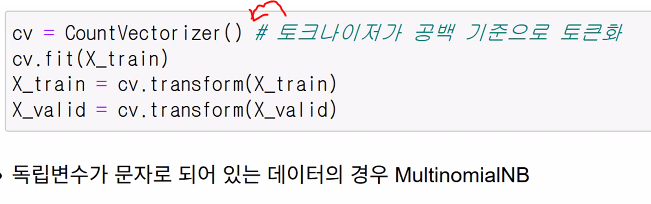

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [41]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred= mnb.predict(X_valid)
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82     22638
           1       0.83      0.80      0.82     22361

    accuracy                           0.82     44999
   macro avg       0.82      0.82      0.82     44999
weighted avg       0.82      0.82      0.82     44999



### 자연어를 숫자화하면 결과가 잘나옴
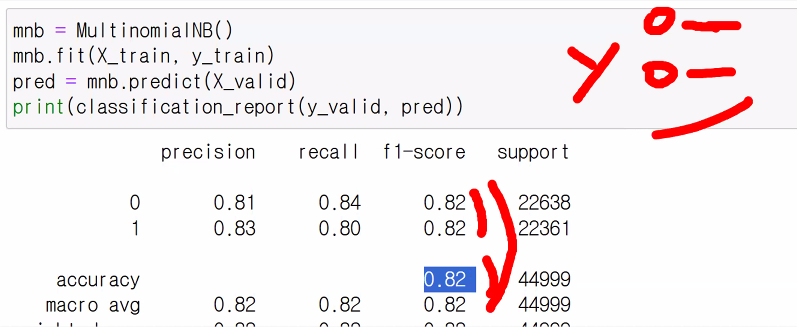
X와 y의 비율이 균등했기 때문?

## test데이터 불러와 검증

In [42]:
test_df

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [43]:
X_test = test_df['document']
y_test = test_df['label']

In [45]:
# 동일한 작업 test데이터에도 해줌
# cv.fit(X_train)
X_test= cv.transform(X_test)


In [47]:
test_pred= mnb.predict(X_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82     24826
           1       0.83      0.80      0.82     25171

    accuracy                           0.82     49997
   macro avg       0.82      0.82      0.82     49997
weighted avg       0.82      0.82      0.82     49997



# Konlpy의 Mecab을 이용한 형태소분리
코앤엘피

In [49]:
from konlpy.tag import Mecab
mecab = Mecab()

In [63]:
def tokenizer(text): 
    tokens = mecab.morphs(text) # morphs 형태소에 따라 문장 쪼갬
    return tokens

# CountVectorizer
카운트 벡터라이저: 모든 str을 벡터(숫자)화.

# TfidVectorizer
티에프아이디- : 자주 등장하는 단어면 가중치(중요표시)<br>
빈도와 중요도를 함께 표시하니 좀더 좋다?

### 1) CountVectorizer: 단어 빈도(횟수) 기반 벡터화
작동 방식: CountVectorizer는 각 문서에서 등장한 단어의 **횟수(빈도)** 를 기준으로 벡터를 만듭니다. 단순히 각 문서에서 특정 단어가 몇 번 등장했는지를 세어 벡터화합니다.<br>
특징:
각 단어의 빈도가 높을수록 해당 단어의 중요성이 더 크다고 가정합니다.<br>
빈도가 높다는 것만을 고려하기 때문에, 모든 문서에서 자주 등장하는 단어도 중요한 단어로 처리될 수 있습니다.<br>
예시:<br>
예를 들어, 두 개의 문서가 있다면:<br>
문서 1: "고양이가 나무 위에 있다."<br>
문서 2: "나무 아래에 고양이가 있다."<br>
이 두 문서를 CountVectorizer로 변환하면 단어 빈도가 포함된 벡터가 생성됩니다:<br>
['고양이': 2, '나무': 2, '위에': 1, '아래에': 1, '있다': 2]<br>
### 2) TfidfVectorizer: TF-IDF (Term Frequency-Inverse Document Frequency) 기반 벡터화
작동 방식: TfidfVectorizer는 단어의 빈도뿐만 아니라, 단어의 중요도를 계산합니다. 여기서는 TF-IDF 값을 사용하여 문서 간 차별성을 강조합니다.<br>
TF (Term Frequency): 단어가 문서에서 얼마나 자주 등장했는지를 나타냅니다.<br>
IDF (Inverse Document Frequency): 단어가 다른 문서에 얼마나 자주 등장하지 않았는지를 나타냅니다. 자주 등장하지 않는 단어는 더 중요한 단어로 간주합니다.<br>
특징:<br>
TF-IDF는 문서 전체에서 자주 등장하는 흔한 단어들(예: "그리고", "이다" 등)의 중요도를 낮추고, 문서에서만 중요한 단어들의 중요도를 높입니다.<br>
단순히 빈도가 높은 단어보다 특정 문서에서 더 특징적인 단어에 더 높은 가중치를 부여합니다.<br>
예시:<br>
위의 문서 1과 문서 2에 대해 TfidfVectorizer로 변환하면, 공통 단어들(예: "있다", "고양이")의 중요도는 낮아지고, 차별적인 단어(예: "위에", "아래에")의 중요도는 상대적으로 높아집니다.

In [50]:
# countervectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
doc = ['고양이가 나무 위에 있다', '나무 아래에 고양이가 있다']

In [52]:
c_vec= CountVectorizer() # 불러옴

In [53]:
X=c_vec.fit_transform(doc) #따로하지않고 fit과 함께
print(c_vec.get_feature_names_out()) # 벡터화된 단어 목록 출력
print("단어의 빈도:",X.toarray()) 

['고양이가' '나무' '아래에' '위에' '있다']
단어의 빈도: [[1 1 0 1 1]
 [1 1 1 0 1]]


In [56]:
# tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
tfidf=TfidfVectorizer()
X2=tfidf.fit_transform(doc)
print(tfidf.get_feature_names_out()) # 벡터화된 단어 목록 출력
print("단어의 빈도:",X2.toarray()) 

['고양이가' '나무' '아래에' '위에' '있다']
단어의 빈도: [[0.44832087 0.44832087 0.         0.63009934 0.44832087]
 [0.44832087 0.44832087 0.63009934 0.         0.44832087]]


### CountVectorizer와 TfidfVectorizer 비교

| **특성**             | **CountVectorizer**                                     | **TfidfVectorizer**                                               |
|----------------------|--------------------------------------------------------|-------------------------------------------------------------------|
| **기반**             | 단어의 단순 빈도                                        | 단어 빈도 + 문서 내에서의 상대적 중요도(TF-IDF)                     |
| **단어 빈도 계산**    | 문서에서 등장한 단어의 단순한 등장 횟수를 셈            | 단어의 등장 횟수(TF)와 해당 단어가 문서들에서 얼마나 자주 등장하지 않았는지를 함께 고려(IDF) |
| **빈번한 단어 처리**  | 문서에서 자주 등장하는 단어일수록 높은 가중치를 부여    | 문서에서 흔한 단어는 가중치를 낮추고, 드문 단어는 높은 가중치를 부여   |
| **주요 용도**        | 단순한 단어 빈도 기반 분석이 필요할 때 사용             | 문서 간 차별적인 단어를 구별할 때 유용                                |
| **계산 비용**         | 상대적으로 적음                                         | 상대적으로 더 복잡하고 계산 비용이 높음                                |


#### tokenizer: str을 형태소별로 나누되 공백기준으로.
- 한국어는 공백이아닌 조사를 통해 나눠야함
    - knolpy의 형태소 분석 후 조사로 확인되면 나눔
- ngram_range(1,2)
    - 벡터화할 때) 단어의 범위를 지정
    - (1,2)라면 1-gram, 2-gram으로 분석<br>
    <br> 예) **"이영화 정말 좋다"**
    <br> 1-gram:['이','영화는','정말','좋다']
    <br> 2-gram:['이 영화는','영화는 정말','정말 좋다']
    
- min_df=4 인 경우)
    - 단어 등장의 최소 문서 수를 설정하는 파라미터
    - 문서 3개 이상 등장하는 단어면 가중치를 줄이도록.
- max_df=0.9
    - 단어가 전체 문서의 90% 이하일때만 포함(벡터화)시킬것.

In [60]:
# 이전 예제데이터 재활용
X = train_df['document']
y = train_df['label']

In [61]:
tf_X_train, tf_X_valid, tf_y_train, tf_y_valid = train_test_split(X,y, test_size=0.3, random_state=10)

In [65]:
# tokenizer 함수를 만들었는데
# konlpy의 mecab 사용
tfidf = TfidfVectorizer(tokenizer=tokenizer, ngram_range=(1,2), min_df=4, max_df=0.9)
tf_X_train= tfidf.fit_transform(tf_X_train)
tf_X_valid= tfidf.transform(tf_X_valid)

/home/fintech/miniforge3/envs/fintech/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [41]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred= mnb.predict(X_valid)
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82     22638
           1       0.83      0.80      0.82     22361

    accuracy                           0.82     44999
   macro avg       0.82      0.82      0.82     44999
weighted avg       0.82      0.82      0.82     44999



In [66]:
# test데이터 벡터화
tf_X_test= tfidf.transform(X_test)

In [68]:
test_pred=mnb.pred(tf_X_test)
print(classification_report(y_test, test_pred))

AttributeError: 'MultinomialNB' object has no attribute 'pred'

# random_Forest와 비교

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc= RandomForestClassifier(n_jobs=8, random_state=10) # 나머지 기본값

In [75]:
rfc.fit(tf_X_train, y_train)
rfc_test_pred = rfc.predict(tf_X_valid)
print(classification_report(y_test, rfc_test_pred))

# 여기서 시간이 좀 걸렸음 - 15만개정도면 많은양

ValueError: Found input variables with inconsistent numbers of samples: [49997, 44999]

In [ ]:
rfc_test_pred=rfc.predict(tf_X_test)
print(classification_report(y_test, rfc_test_pred))

# 나이브 베이즈가 좀더 빠르다
20으로.